# INSTALL ANACONDA

To install Anaconda, download the bash installer [here](https://www.anaconda.com/products/individual)  and follow the instructions [there](https://docs.anaconda.com/anaconda/install/linux/).

With the default values in the installer, this will install anaconda in the folder ```anaconda3``` in your home directory.

# CREATE CONDA ENVIRONEMENT

Open a terminal, and type
```bash
conda create -n env_name python=3.9
```

In order to use this environment, you should activate it using
```bash
conda activate env_name
```
After activating, the environment name should appear on the left in the command line.

# INSTALL PYTHON PACKAGES (LIBRAIRIES) FOR SCIENTIFIC COMPUTING

Use ```conda install -n env_name``` to install packages to your conda environment. Below is a list of popular packages for scientific computing.

- [NumPy](https://numpy.org/): Scientific computing using arrays. Uses methods written in C and Fortran
- [Scikit-learn](https://scikit-learn.org/): tools for machine learning. Uses NumPy arrays
- [Matplotlib](https://matplotlib.org/): librairies for visualization

To install these packages, type:

```bash
conda install -n env_name numpy scikit-learn matplotlib -y
```

# Examples

1. 1-D Kernel Density Estimation
2. Gaussian Mixture modelling

## Example 1: 1-D Kernel Density Estimation

### 1. Create Dataset

Function used:
- [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html): random samples from a normal ditribution
- [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html): plot histogram with matplotlib

In [55]:
# import numpy pacakge with alias 'np'
import numpy as np

def sample_bimodal(n, seed=0):
    """Return n samples from a bimodal distribution
    (sum of 2 Gaussians).
    
    Args:
        n (int): number of samples
        seed (int): seed for random number generator (default is 0)
        
    Returns:
        ndarray: array of samples of shape (n, 1)
    """
    # set seed for reproducibility
    np.random.seed(seed)

    # 2 Gaussians
    mean1 = 0
    mean2 = 5
    sd1 = 1
    sd2 = 2
    
    # random sampling of 2 Gaussians
    samples1 = np.random.normal(mean1, sd1, int(0.3*n))
    samples2 = np.random.normal(mean2, sd2, int(0.7*n))
    samples = np.concatenate((samples1, samples2))
    
    # reshape array to a n x 1 matrix,
    # required for input to scikit-learn estimator
    samples = samples.reshape(n, 1)
    
    return samples

samples = sample_bimodal(1000)

# display the first 5 elements of array 'samples'
print(samples[:5])

[[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]
 [1.86755799]]


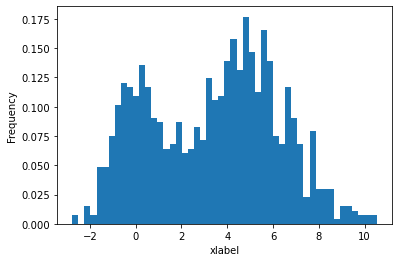

In [5]:
# import matplotlib.pyplot, the plotting module of matplotlib
# with alias 'plt'
import matplotlib.pyplot as plt

plt.hist(samples, bins=50, density=True)
plt.xlabel('xlabel')
plt.ylabel('Frequency')
plt.show()

### 2. Kernel Density Estimation

Functions/Class used:
- [sklearn.neighbors.KernelDensity](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity): kernel density estimator from scikit-learn
- [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html): evenly sample an interval

In [6]:
# import function KernelDensity using a from ... import ... clause
from sklearn.neighbors import KernelDensity

# estimator (model)
kde = KernelDensity(kernel='gaussian', bandwidth=.5)

# fit the estimator to data 'samples'
kde.fit(samples)

# use the trained estimator to predict values of the PDF for data points 'xs'
xs = np.linspace(samples.min(), samples.max(), 1000).reshape(1000, 1)
log_dens = kde.score_samples(xs)

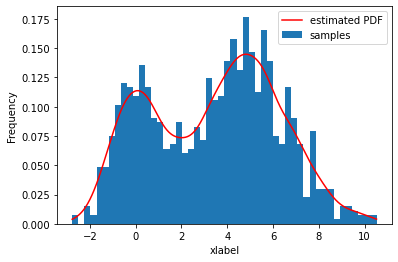

In [79]:
# plot estimated PDF on top of histogram
plt.hist(samples, bins=50, density=True, label='samples')
plt.plot(xs, np.exp(log_dens), '-r', label='estimated PDF')
plt.xlabel('xlabel')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Example 2: Gaussian Mixture modelling

Function/class used:
- [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html): sklearn estimator for Gaussian Mixture modelling
- [numpy.ndarray.ravel](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.ravel.html): flatten array
- [numpy.sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html): sum elements of array-like objects
- np.sqrt, np.exp

In [58]:
from sklearn.mixture import GaussianMixture

# create 1000 samples using func sample_bimodal() from Example 1
samples = sample_bimodal(1000)

# create estimator with 2 gaussians
gm = GaussianMixture(n_components=2)

# fit estimator to samples
gm.fit(samples)

weights = gm.weights_
means = gm.means_.ravel()
covs = gm.covariances_.ravel()
sds = np.sqrt(covs)

print("weights: ", weights)
print("means: ", means)
print("covs: ", sds)

weights:  [0.67595135 0.32404865]
means:  [4.97405082 0.12038735]
covs:  [1.85970181 1.06359069]


In [59]:
def gaussian(x, w, m, sd):
    return w / np.sqrt(2 * np.pi * sd**2) * np.exp(-(x - m)**2 / (2 * sd)**2)

def gm_pdf(x, weights, means, sds):
    """Returns a list with gaussians evaluated at 'x'
    
    Args:
        x (ndarray): values
        weights (ndarray): gaussians weights (amplitudes)
        means (ndarray): gaussians means
        sds (ndarray): gaussian standard deviations
        
    Returns:
        list of ndarray: of length len(weights)
    """
    y = []
    y.append(gaussian(x, weights[0], means[0], sds[0]))
    for i in range(1, len(weights)):
        y.append(gaussian(x, weights[i], means[i], sds[i]))
    return y

xs = np.linspace(samples.min(), samples.max(), 1000)
dens = gm_pdf(xs, weights, means, sds)
dens_sum = np.sum(dens, axis=0)

print(dens_sum[:10])

[0.0210134  0.0213691  0.02172923 0.02209381 0.02246287 0.02283642
 0.02321447 0.02359706 0.0239842  0.02437589]


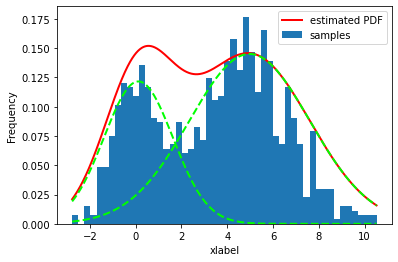

In [60]:
# plot results
plt.hist(samples, bins=50, density=True, label='samples')
plt.plot(xs, dens_sum, '-r', label='estimated PDF', linewidth=2.)
for g in dens:
    plt.plot(xs, g, '--', color='lime', linewidth=2.)
plt.xlabel('xlabel')
plt.ylabel('Frequency')
plt.legend()
plt.show()